In [35]:
import xnet
import json
import glob

import numpy as np
import matplotlib.pyplot as plt

from igraph import *
from collections import defaultdict
from matplotlib.ticker import MaxNLocator
from util import save,load
from util import get_attr_pacs,get_pac_list,get_pacs_paper_published

In [36]:
attr_pacs = get_attr_pacs()
pac_list = get_pac_list()

In [37]:
def get_in(paper,data):
    pacs = []
    p_neighbors = data.neighbors(paper,mode=IN)
    n_neighbors = len(p_neighbors)
    return n_neighbors

def get_out(paper,data):
    pacs = []
    p_neighbors = data.neighbors(paper,mode=OUT)
    n_neighbors = len(p_neighbors)
    return n_neighbors

In [52]:
def get_freq_of(data,get_freq,delta,filename):

	history = defaultdict(lambda:defaultdict(lambda:0))

	year_begin = 1990
	year_end = 2009

	for i,year in enumerate(range(year_begin,year_end+1)):
		print("current year %d" % year)
		subset = data.vs.select(year_ge=year,year_le=year+delta)
		subgraph = data.subgraph(subset)
		for paper in subgraph.vs:
			authors_idxs = paper['authors_idxs'].split(',')
			value = get_freq(paper,subgraph)
			for author in authors_idxs:
				history[author][year-1] += value
		save(history,filename)

	return history

In [39]:
data = xnet.xnet2igraph('data/citation_network_ge1985_pacs.xnet')

filenames = sorted(glob.glob('data/pacs/2lvls/*_multilevel2.xnet'))
pac_nets = []
for filename in filenames:
	net = xnet.xnet2igraph(filename)
	pac_nets.append(net)

In [53]:
get_freq_of(data,get_in,1,'authors_in_freq2.json')

current year 1990
current year 1991
current year 1992
current year 1993
current year 1994
current year 1995
current year 1996
current year 1997
current year 1998
current year 1999
current year 2000
current year 2001
current year 2002
current year 2003
current year 2004
current year 2005
current year 2006
current year 2007
current year 2008
current year 2009


defaultdict(<function __main__.get_freq_of.<locals>.<lambda>()>,
            {'2063249991': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1989: 21,
                          1990: 5,
                          1991: 4,
                          1992: 0,
                          1993: 4,
                          1994: 5,
                          1995: 3,
                          1996: 4,
                          1997: 1,
                          1998: 2,
                          1999: 0,
                          2000: 6,
                          2001: 2,
                          2002: 3,
                          2003: 5,
                          2004: 2,
                          2005: 4,
                          2006: 4,
                          2007: 3,
                          2008: 0}),
             '2115729506': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
            

In [54]:
get_freq_of(data,get_out,1,'authors_out_freq2.json')

current year 1990
current year 1991
current year 1992
current year 1993
current year 1994
current year 1995
current year 1996
current year 1997
current year 1998
current year 1999
current year 2000
current year 2001
current year 2002
current year 2003
current year 2004
current year 2005
current year 2006
current year 2007
current year 2008
current year 2009


defaultdict(<function __main__.get_freq_of.<locals>.<lambda>()>,
            {'2063249991': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
                         {1989: 20,
                          1990: 7,
                          1991: 3,
                          1992: 4,
                          1993: 1,
                          1994: 2,
                          1995: 5,
                          1996: 2,
                          1997: 2,
                          1998: 2,
                          1999: 8,
                          2000: 1,
                          2001: 2,
                          2002: 2,
                          2003: 3,
                          2004: 2,
                          2005: 2,
                          2006: 1,
                          2007: 0,
                          2008: 0}),
             '2115729506': defaultdict(<function __main__.get_freq_of.<locals>.<lambda>.<locals>.<lambda>()>,
            

In [42]:
def get_min_freqs(data,min_values):
    freq = defaultdict(lambda:[])
    for author,a_hist in data.items():
        for year,value in a_hist.items():
            freq[year].append(value)
    
    years = []
    freqs_dict = {}
    for min_value in min_values:
        freqs_dict[min_value] = []
    
    for year,freqs in freq.items():
        years.append(year)
        freqs = np.asarray(freqs)
        total = len(freqs)
        
#         print('total',total)
        
        for min_value in min_values:
#             print(sum(freqs >= min_value))
            p = sum(freqs >= min_value)
            freqs_dict[min_value].append(p)
    return years,freqs_dict

In [43]:
def plot_min_values(years,freqs_dict,title):
    plt.figure(figsize=(10,3))
    for min_value,freqs in freqs_dict.items():
        plt.plot(years,freqs,marker='o',ls='-',label=min_value)
    plt.legend()
    plt.xlabel('year')
    plt.xticks(rotation=45)
    #plt.ylabel('%')
    plt.title(title)
    #plt.ylim((0, 15))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('temp/%s.pdf' % title)
    plt.show()

In [44]:
authors_out = load('authors_out_freq.json')
authors_in = load('authors_in_freq.json')

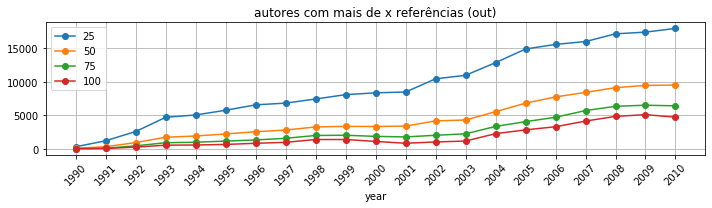

In [15]:
min_values = [25,50,75,100]
years,freqs_dict = get_min_freqs(authors_out,min_values)
plot_min_values(years,freqs_dict,'autores com mais de x referências (out)')

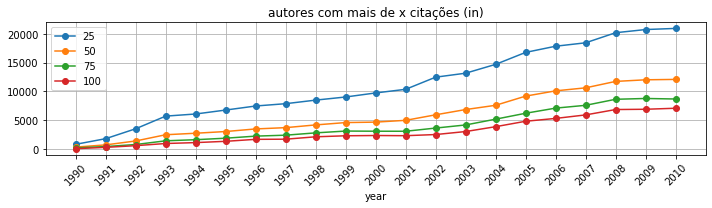

In [16]:
years,freqs_dict = get_min_freqs(authors_in,min_values)
plot_min_values(years,freqs_dict,'autores com mais de x citações (in)')

In [17]:
def get_total_of(data,get_out,filename):
    freqs = defaultdict(lambda:0)
    for paper in data.vs:
        authors_idxs = paper['authors_idxs'].split(',')
        value = get_out(paper,data)
        for author in authors_idxs:
            freqs[author] += value
    save(freqs,filename)
    return freqs

In [18]:
# get_total_of(data,get_out,'num_of_refs.json')
# get_total_of(data,get_in,'num_of_citations.json')

In [25]:
def get_ranking_by_year(authors_in,years,min_value):
    ranking_by_year = dict()
    for year in years:
        ranking = []
        for a, a_hist in authors_in.items():
            if year in a_hist:
                count = a_hist[year]
                ranking.append((count,a))

#         ranking = sorted(ranking,reverse=True)
        authors = []
        for c,a in ranking:
            if c >= min_value:
                authors.append(a)
    
#         print(len(ranking))
    
        print(len(authors)*100/len(ranking))
        ranking_by_year[year] = authors
    return ranking_by_year

In [26]:
years = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
ranking_in_by_year = get_ranking_by_year(authors_in,years,25)

1.9047149095753868
3.152675732480644
4.842075970502296
6.324559742473016
6.343013560708555
6.55415401385969
6.837779698100719
6.950316890484421
7.265390229243582
7.575260541522622
7.995653104572473
8.358995498007646
9.626904318387348
10.07047108387591
10.91309065505299
12.052393584517725
12.34609768082441
12.64021062446864
13.2833267535202
13.245248799427813
13.011838548301899


In [34]:
# save(ranking_by_year,'authors_in_ranking1000_by_year.json')

In [27]:
ranking_out_by_year = get_ranking_by_year(authors_out,years,25)

0.7105672201524759
2.1377117502290406
3.5731181299568666
5.230738385109772
5.293186084804246
5.596433855018298
6.028792586736288
6.0444089881664675
6.3810423284966085
6.802257605961964
6.878468048672056
6.854828932373124
8.079488626262782
8.40674071237074
9.566419430117277
10.718111300421995
10.797212283117979
10.989221951018841
11.305434925648111
11.13466843772351
11.181058322716963


In [36]:
# save(ranking_by_year,'authors_out_ranking1000_by_year.json')

In [33]:
ranking_by_year = dict()
for year,ranking_in in ranking_in_by_year.items():
    ranking_in = set(ranking_in)
    ranking_out = set(ranking_out_by_year[year])
    ranking = ranking_in & ranking_out
    ranking_by_year[year] = list(ranking)

In [34]:
save(ranking_by_year,'authors_ranking_min25_by_year.json')